In [1]:
import sys

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display as display

sys.path.append('../src')
import const
from metrics import row_wise_micro_averaged_f1_score

pd.options.display.max_rows=120

In [2]:
def fill_dropped(dropped_array, drop_idx):
    filled_array = np.zeros(
        (len(dropped_array) + len(drop_idx), dropped_array.shape[1])
    )
    idx_array = np.arange(len(filled_array))
    use_idx = np.delete(idx_array, drop_idx)
    filled_array[use_idx, :] = dropped_array
    return filled_array

In [3]:
def extract_label(preds, th=0.5):
    events = preds >= th
    nocall_col = np.zeros((len(preds), 1)).astype(bool)
    nocall_col[events.sum(1) == 0] = True
    events = np.concatenate([events, nocall_col], axis=1)
    
    predict_labels = []
    for i in range(len(events)):
        event = events[i, :]
        labels = np.argwhere(event).reshape(-1).tolist()
        
        row_labels = []
        for label in labels:
            row_labels.append(const.INV_BIRD_CODE[label])
        predict_labels.append(" ".join(row_labels))

    return predict_labels

In [4]:
valid_df = pd.read_csv('../data/input/train_soundscape_labels.csv')
use_idx = valid_df[~valid_df["audio_id"].isin([7019, 7954, 14473])].index
drop_idx = valid_df[valid_df["audio_id"].isin([7019, 7954, 14473])].index
valid_df = valid_df.iloc[use_idx].reset_index(drop=True)

val_y_labels = valid_df["birds"].tolist()

In [5]:
oof4 = np.load("../logs/exp_004_20210409202215_0.701/oof.npy")
oof10 = np.load("../logs/exp_010_20210412203406_0.684/oof.npy")
oof11 = np.load("../logs/exp_011_20210413092718_0.710/oof.npy")
oof12 = np.load("../logs/exp_012_20210413202510_0.700/oof.npy")
oof20 = np.load("../logs/exp_020_20210420203023_0.698/oof.npy")
oof21 = np.load("../logs/exp_021_20210421105635_0.701/oof.npy")
oof22 = np.load("../logs/exp_022_20210421213519_0.712/oof.npy")
oof23 = np.load("../logs/exp_023_20210422072541_0.696/oof.npy")
oof24 = np.load("../logs/exp_024_20210422215622_0.684/oof.npy")
oof25 = np.load("../logs/exp_025_20210423142123_0.684/oof.npy")
oof28 = np.load("../logs/exp_028_20210425165254_0.671/oof.npy")
oof28 = np.load("../logs/exp_028_20210425165254_0.671/oof.npy")
# oof29 = np.load("../logs/exp_029_20210425212038_0.675/oof.npy")
# oof32 = np.load("../logs/exp_032_20210426185313_0.684/oof.npy")
# oof33 = np.load("../logs/exp_033_20210426230524_0.701/oof.npy")
# oof34 = np.load("../logs/exp_034_20210427025324_0.686/oof.npy")
# oof35 = np.load("../logs/exp_035_20210427085305_0.690/oof.npy")

oof40 = np.load("../logs/exp_040_20210428095746_0.696/oof.npy")
oof41 = np.load("../logs/exp_041_20210428173715_0.689/oof.npy")
oof42 = np.load("../logs/exp_042_20210429120526_0.692/oof.npy")
oof43 = np.load("../logs/exp_043_20210429195623_0.697/oof.npy")
oof44 = np.load("../logs/exp_044_20210429235301_0.707/oof.npy")
oof45 = np.load("../logs/exp_045_20210430131333_0.695/oof.npy")
oof50 = np.load("../logs/exp_050_20210502230529_0.679/oof.npy")
oof51 = np.load("../logs/exp_051_20210503030848_0.694/oof.npy")
oof52 = np.load("../logs/exp_052_20210503093904_0.692/oof.npy")

oof54 = np.load("../logs/exp_054_20210503234704_0.685/oof.npy")
oof55 = np.load("../logs/exp_055_20210504024705_0.693/oof.npy")
oof55 = oof54 * 0.5 + oof55 * 0.5

oof56 = np.load("../logs/exp_056_20210504114210_0.697/oof.npy")
oof57 = np.load("../logs/exp_057_20210504153605_0.690/oof.npy")
oof60 = np.load("../logs/exp_060_20210505181921_0.706/oof.npy")
oof61 = np.load("../logs/exp_061_20210505232548_0.656/oof.npy")
oof62 = np.load("../logs/exp_062_20210506032156_0.648/oof.npy")
oof65 = np.load("../logs/exp_065_20210507102634_0.640/oof.npy")
oof65 = fill_dropped(oof65, drop_idx)
oof66 = np.load("../logs/exp_066_20210507141914_0.637/oof.npy")
oof66 = fill_dropped(oof66, drop_idx)
oof67 = np.load("../logs/exp_067_20210507230447_0.629/oof.npy")
oof68 = np.load("../logs/exp_068_20210508025654_0.620/oof.npy")
oof74 = np.load("../logs/exp_074_20210509223155_3.172/oof.npy")
oof74 = fill_dropped(oof74, drop_idx)
oof76 = np.load("../logs/exp_076_20210511000515_0.629/oof.npy")
oof76 = fill_dropped(oof76, drop_idx)
oof77 = np.load("../logs/exp_077_20210511035734_0.629/oof.npy")
oof77 = fill_dropped(oof77, drop_idx)
oof78 = np.load("../logs/exp_078_20210511074917_0.633/oof.npy")
oof78 = fill_dropped(oof78, drop_idx)
oof81 = np.load("../logs/exp_081_20210511225340_0.636/oof.npy")
oof81 = fill_dropped(oof81, drop_idx)
oof82 = np.load("../logs/exp_082_20210512024531_0.625/oof.npy")
oof82 = fill_dropped(oof82, drop_idx)

# nocall classification
oof59 = np.load("../logs/exp_059_20210505100513_0.666/oof.npy")
oof70 = np.load("../logs/exp_070_20210508193023_0.882/oof.npy")
oof79 = np.load("../logs/exp_079_20210511132329_0.874/oof.npy")
oof83 = np.load("../logs/exp_083_20210512081958_0.827/oof.npy")

In [6]:
def intersect(df, col1, col2):
    intersect_list = []
    for idx in df.index.values:
        col1_array = df.loc[idx, col1].split(" ")
        col2_array = df.loc[idx, col2].split(" ")
        intersect = np.intersect1d(col1_array, col2_array)
        intersect_list.append(" ".join(list(intersect)))
        
    return intersect_list


def shift(df, freq):
    shift_array = np.array([None] * len(df))

    gp = df.groupby("audio_id")
    for audio_id, audio_df in gp:
        idxs = audio_df.index.values
        audio_shift_array = audio_df["pred_labels"].shift(freq).values
        
        if freq > 0:
            audio_shift_array[:freq] = "None"
        elif freq < 0:
            audio_shift_array[freq:] = "None"
            
        shift_array[idxs] = audio_shift_array

    return shift_array


def arrange_label(label_array):
    arranged_label_array = label_array.copy()
    for idx, label in enumerate(label_array):
        label_list = label.split(" ")
        if "nocall" in label_list and len(label_list) >= 2:
            label_list.remove("nocall")
        
        arranged_label_array[idx] = " ".join(set(label_list))
        
    return arranged_label_array
    

def post_process_v5(preds, pred_labels, df):
    df_  = df.copy()
    
    df_["pred_labels"] = pred_labels
    df_["first_label"] = [const.INV_BIRD_CODE[bc] for bc in np.argsort(preds)[:, -1]]
    
    df_["pre_pred_labels"] = shift(df_, freq=1)
    df_["post_pred_labels"] = shift(df_, freq=-1)
    
    df_["pre_intersect"] = intersect(df_, "first_label", "pre_pred_labels")
    df_["post_intersect"] = intersect(df_, "first_label", "post_pred_labels")
    
    df_["concat_labels"] = (
        df_["pred_labels"]
        + df_["pre_intersect"].apply(lambda x: f" {x}" if len(x) > 0 else "")
        + df_["post_intersect"].apply(lambda x: f" {x}" if len(x) > 0 else "")
    )
    
    post_labels = arrange_label(df_["concat_labels"])
    
    return post_labels

In [7]:
concat_oof = np.concatenate([
    oof4[np.newaxis, :, :],
    oof10[np.newaxis, :, :],
    oof11[np.newaxis, :, :],
    oof12[np.newaxis, :, :],
    oof44[np.newaxis, :, :],
    oof45[np.newaxis, :, :],
    oof51[np.newaxis, :, :],
    oof76[np.newaxis, :, :],
    oof77[np.newaxis, :, :],
], axis=0)

oof = np.mean(concat_oof, axis=0)[use_idx, :]

In [8]:
oof_labels = extract_label(oof, th=0.18)

In [9]:
score = row_wise_micro_averaged_f1_score(val_y_labels, oof_labels)
score

0.7135784313725465

In [10]:
valid_df["oof_birds"] = oof_labels
valid_df["oof_birds_post"] = post_process_v5(oof, extract_label(oof, th=0.27), valid_df)

oof_argsort_array = np.argsort(oof, axis=1)[:, ::-1]

valid_df["first_label"] = oof_argsort_array[:, 0]
valid_df["second_label"] = oof_argsort_array[:, 1]
valid_df["third_label"] = oof_argsort_array[:, 2]

valid_df["first_label"] = valid_df["first_label"].apply(lambda x: const.INV_BIRD_CODE[x])
valid_df["second_label"] = valid_df["second_label"].apply(lambda x: const.INV_BIRD_CODE[x])
valid_df["third_label"] = valid_df["third_label"].apply(lambda x: const.INV_BIRD_CODE[x])

In [11]:
valid_df["nocall_birds"] = 0
valid_df.loc[valid_df[valid_df["birds"] == "nocall"].index, "nocall_birds"] = 1

valid_df["nocall_oof_birds"] = 0
valid_df.loc[valid_df[valid_df["oof_birds"] == "nocall"].index, "nocall_oof_birds"] = 1

In [12]:
valid_df["acc"] = valid_df["birds"] == valid_df["oof_birds"]
valid_df.head()

,row_id,site,audio_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,nocall_birds,nocall_oof_birds,acc
0,11254_COR_5,COR,11254,5,rubwre1,nocall,nocall,wbwwre1,rubwre1,burwar1,0,1,False
1,11254_COR_10,COR,11254,10,nocall,wbwwre1,nocall,wbwwre1,rewbla,gbwwre1,1,0,False
2,11254_COR_15,COR,11254,15,rubwre1,rubwre1 wbwwre1,rubwre1,rubwre1,wbwwre1,orbeup1,0,0,False
3,11254_COR_20,COR,11254,20,nocall,nocall,nocall,scamac1,meapar,grbher3,1,1,True
4,11254_COR_25,COR,11254,25,rubwre1,rubwre1 wbwwre1,rubwre1,rubwre1,wbwwre1,gbwwre1,0,0,False


In [13]:
valid_df["diff"] = (valid_df["birds"].apply(lambda x: 1 if x == "nocall" else 0) - 
                                 valid_df["oof_birds"].apply(lambda x: 1 if x == "nocall" else 0))
valid_df["diff_pattern"] = valid_df["diff"].map({-1: "bird -> nocall", 0: "birdX -> birdY", 1: "nocall -> bird"})
valid_df["nocall_p"] = 1 - oof70.reshape(-1)

In [14]:
valid_df["diff_pattern"].value_counts()

birdX -> birdY    1572
bird -> nocall     424
nocall -> bird      44
Name: diff_pattern, dtype: int64

何かしらの鳥の鳴き声が聞こえているのに `nocall`と予測しているパターンが多い

In [15]:
valid_df[~valid_df["acc"]]

,row_id,site,audio_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label,nocall_birds,nocall_oof_birds,acc,diff,diff_pattern,nocall_p
0,11254_COR_5,COR,11254,5,rubwre1,nocall,nocall,wbwwre1,rubwre1,burwar1,0,1,False,-1,bird -> nocall,0.000028
1,11254_COR_10,COR,11254,10,nocall,wbwwre1,nocall,wbwwre1,rewbla,gbwwre1,1,0,False,1,nocall -> bird,0.987246
2,11254_COR_15,COR,11254,15,rubwre1,rubwre1 wbwwre1,rubwre1,rubwre1,wbwwre1,orbeup1,0,0,False,0,birdX -> birdY,0.018530
4,11254_COR_25,COR,11254,25,rubwre1,rubwre1 wbwwre1,rubwre1,rubwre1,wbwwre1,gbwwre1,0,0,False,0,birdX -> birdY,0.000000
41,11254_COR_210,COR,11254,210,nocall,chcant2,nocall,chcant2,littin1,coltro1,1,0,False,1,nocall -> bird,0.983349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,54955_SSW_500,SSW,54955,500,chswar,nocall,nocall,chswar,amered,tropar,0,1,False,-1,bird -> nocall,0.976802
2023,54955_SSW_520,SSW,54955,520,chswar,nocall,nocall,rucwar,chswar,wlswar,0,1,False,-1,bird -> nocall,0.290501
2030,54955_SSW_555,SSW,54955,555,chswar,ducfly,nocall,ducfly,canwar,eursta,0,0,False,0,birdX -> birdY,0.100228
2031,54955_SSW_560,SSW,54955,560,grycat,nocall,nocall,blujay,grycat,rebnut,0,1,False,-1,bird -> nocall,0.993553


In [16]:
gp = valid_df.groupby("audio_id")

for audio_id, audio_df in gp:
    idxs = audio_df.index.values
    score = row_wise_micro_averaged_f1_score( valid_df.loc[idxs, "birds"].values, valid_df.loc[idxs, "oof_birds"])

    print(f"audio_id: {audio_id}\n score: {score:.4f}   nocall_mean: {audio_df['nocall_p'].mean():.4f}")
    print("-" * 50)
    print(audio_df['birds'].value_counts())
    print("\n")
    print(audio_df['oof_birds'].value_counts())
    print("\n")
    print(audio_df[~valid_df["acc"]]["diff_pattern"].value_counts())
    print("\n" * 2)

audio_id: 2782
 score: 0.2556   nocall_mean: 0.0319
--------------------------------------------------
eawpew reevir1                  37
reevir1                         23
bkcchi eawpew reevir1           20
eawpew grycat reevir1           16
grycat reevir1                   9
bkcchi reevir1                   8
bkcchi eawpew grycat reevir1     3
bkcchi grycat reevir1            2
chswar eawpew reevir1            1
chswar eawpew grycat reevir1     1
Name: birds, dtype: int64


nocall                    66
reevir1                   17
grycat                    11
eawpew                     9
gbwwre1                    3
andsol1                    2
grycat obnthr1             2
butsal1 grycat             1
gbwwre1 grycat obnthr1     1
butsal1 grycat obnthr1     1
herthr                     1
eawpew reevir1             1
obnthr1                    1
gbwwre1 reevir1            1
chswar                     1
hutvir                     1
gbwwre1 grycat             1
Name: oof_birds, dtype: in

<ipython-input-16-f7d84f10d71f>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(audio_df[~valid_df["acc"]]["diff_pattern"].value_counts())


## audio_id: 2782

In [17]:
idx = valid_df[valid_df["audio_id"] == 2782].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "oof_birds_post", "first_label", "second_label", "third_label"]]

,row_id,seconds,birds,oof_birds,oof_birds_post,first_label,second_label,third_label
960,2782_SSW_5,5,bkcchi grycat reevir1,grycat,grycat,grycat,gbwwre1,obnthr1
961,2782_SSW_10,10,eawpew grycat reevir1,nocall,grycat,grycat,amerob,relpar
962,2782_SSW_15,15,bkcchi eawpew grycat reevir1,nocall,grycat,grycat,grasal1,butsal1
963,2782_SSW_20,20,eawpew grycat reevir1,grycat,grycat,grycat,butsal1,grasal1
964,2782_SSW_25,25,eawpew grycat reevir1,obnthr1,nocall,obnthr1,grycat,gbwwre1
965,2782_SSW_30,30,bkcchi reevir1,nocall,nocall,reevir1,gbwwre1,rucwar1
966,2782_SSW_35,35,eawpew grycat reevir1,grycat obnthr1,grycat,grycat,obnthr1,grasal1
967,2782_SSW_40,40,bkcchi eawpew grycat reevir1,grycat,grycat,grycat,amerob,brnthr
968,2782_SSW_45,45,eawpew reevir1,nocall,nocall,hutvir,reevir1,buhvir
969,2782_SSW_50,50,bkcchi eawpew reevir1,nocall,nocall,scatan,yetvir,casvir


In [18]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.3766666666666667

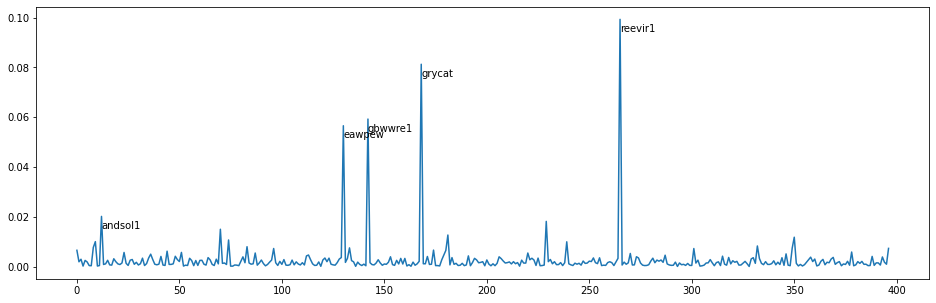

In [19]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [20]:
top5_birds

['andsol1', 'eawpew', 'gbwwre1', 'grycat', 'reevir1']

## audio_id: 7843

In [21]:
idx = valid_df[valid_df["audio_id"] == 7843].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "first_label", "second_label", "third_label"]]

,row_id,seconds,birds,oof_birds,first_label,second_label,third_label
1080,7843_SSW_5,5,nocall,nocall,swathr,mallar3,comrav
1081,7843_SSW_10,10,nocall,nocall,comrav,mallar3,eursta
1082,7843_SSW_15,15,nocall,nocall,mallar3,comrav,eursta
1083,7843_SSW_20,20,nocall,nocall,comrav,mallar3,bcnher
1084,7843_SSW_25,25,nocall,nocall,mallar3,bcnher,whimbr
1085,7843_SSW_30,30,nocall,nocall,gnwtea,whimbr,mallar3
1086,7843_SSW_35,35,nocall,nocall,mallar3,comrav,bcnher
1087,7843_SSW_40,40,nocall,nocall,comrav,mallar3,bcnher
1088,7843_SSW_45,45,nocall,nocall,mallar3,comrav,whimbr
1089,7843_SSW_50,50,nocall,nocall,mallar3,comrav,bcnher


In [22]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.016666666666666666

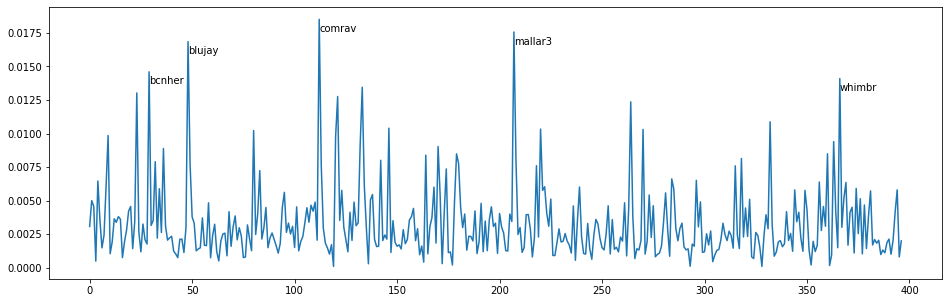

In [23]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [24]:
top5_birds

['bcnher', 'blujay', 'comrav', 'mallar3', 'whimbr']

## audio_id: 10534

In [39]:
idx = valid_df[valid_df["audio_id"] == 10534].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "first_label", "second_label", "third_label"]]

,row_id,seconds,birds,oof_birds,first_label,second_label,third_label
1200,10534_SSW_5,5,nocall,nocall,mallar3,bcnher,comrav
1201,10534_SSW_10,10,swaspa,swaspa,swaspa,chispa,rewbla
1202,10534_SSW_15,15,nocall,nocall,eursta,comrav,mallar3
1203,10534_SSW_20,20,nocall,nocall,grhowl,blujay,mallar3
1204,10534_SSW_25,25,swaspa,swaspa,swaspa,lucwar,norwat
1205,10534_SSW_30,30,nocall,nocall,gadwal,rewbla,mallar3
1206,10534_SSW_35,35,nocall,nocall,eucdov,rewbla,mouchi
1207,10534_SSW_40,40,nocall,nocall,gwfgoo,blujay,bcnher
1208,10534_SSW_45,45,nocall,nocall,daejun,rewbla,trokin
1209,10534_SSW_50,50,blujay,nocall,scptyr1,grnjay,comgra


In [40]:
len(df[df["birds"] == "nocall"])

63

In [26]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.3083333333333334

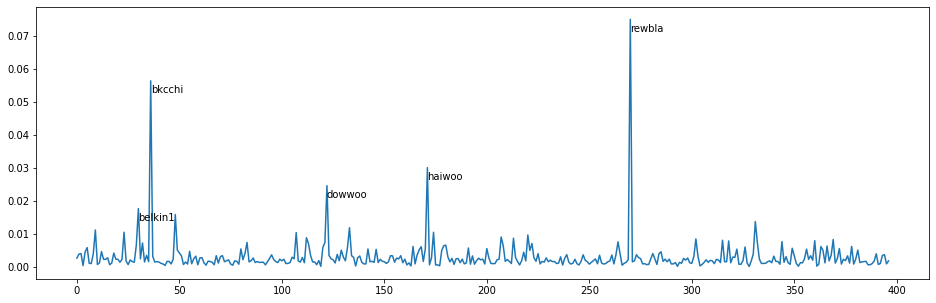

In [41]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [42]:
top5_birds

['belkin1', 'bkcchi', 'dowwoo', 'haiwoo', 'rewbla']

## audio_id: 11254

In [43]:
idx = valid_df[valid_df["audio_id"] == 11254].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "first_label", "second_label", "third_label"]]

,row_id,seconds,birds,oof_birds,first_label,second_label,third_label
0,11254_COR_5,5,rubwre1,nocall,wbwwre1,rubwre1,burwar1
1,11254_COR_10,10,nocall,wbwwre1,wbwwre1,rewbla,gbwwre1
2,11254_COR_15,15,rubwre1,rubwre1 wbwwre1,rubwre1,wbwwre1,orbeup1
3,11254_COR_20,20,nocall,nocall,scamac1,meapar,grbher3
4,11254_COR_25,25,rubwre1,rubwre1 wbwwre1,rubwre1,wbwwre1,gbwwre1
5,11254_COR_30,30,nocall,nocall,goftyr1,burwar1,orbeup1
6,11254_COR_35,35,nocall,nocall,warvir,wbwwre1,balori
7,11254_COR_40,40,nocall,nocall,brbmot1,spotow,ocbfly1
8,11254_COR_45,45,nocall,nocall,ruboro1,comrav,mallar3
9,11254_COR_50,50,nocall,nocall,blhpar1,meapar,littin1


In [50]:
len(df[df["birds"] == "nocall"])

105

In [51]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.10555555555555554

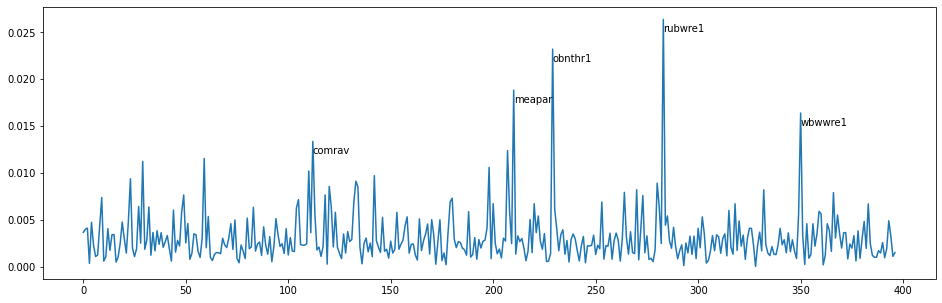

In [53]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [54]:
top5_birds

['comrav', 'meapar', 'obnthr1', 'rubwre1', 'wbwwre1']

## audio_id: 18003

In [55]:
idx = valid_df[valid_df["audio_id"] == 18003].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "first_label", "second_label", "third_label"]]

,row_id,seconds,birds,oof_birds,first_label,second_label,third_label
120,18003_COR_5,5,rucwar,rucwar,rucwar,gcrwar,magwar
121,18003_COR_10,10,nocall,nocall,killde,marwre,belkin1
122,18003_COR_15,15,nocall,nocall,eursta,eucdov,barswa
123,18003_COR_20,20,rucwar,nocall,rucwar,lesvio1,grasal1
124,18003_COR_25,25,rucwar,laufal1,laufal1,rucwar,houwre
125,18003_COR_30,30,rucwar,nocall,laufal1,gcrwar,rucwar
126,18003_COR_35,35,rucwar,rucwar,rucwar,amered,naswar
127,18003_COR_40,40,rucwar,rucwar,rucwar,gcrwar,thswar1
128,18003_COR_45,45,rucwar,nocall,gcrwar,rucwar,bawwar
129,18003_COR_50,50,rucwar,nocall,bucmot2,rucwar,blctan1


In [61]:
len(df[df["birds"] == "nocall"])

24

In [62]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.4444444444444449

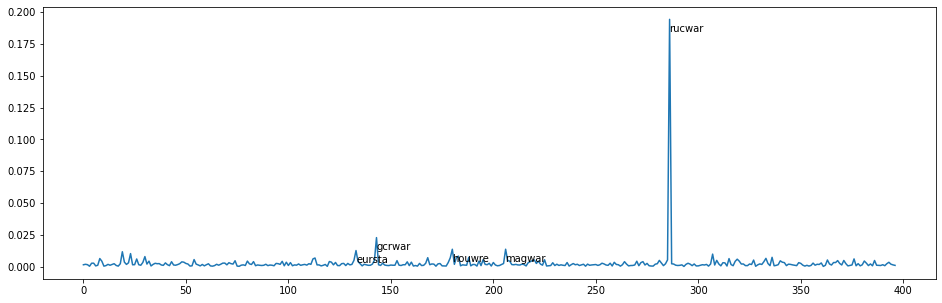

In [63]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [64]:
top5_birds

['eursta', 'gcrwar', 'houwre', 'magwar', 'rucwar']

## audio_id: 20152

In [65]:
idx = valid_df[valid_df["audio_id"] == 20152].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "first_label", "second_label", "third_label"]]

,row_id,seconds,birds,oof_birds,first_label,second_label,third_label
1320,20152_SSW_5,5,nocall,nocall,bcnher,comrav,mallar3
1321,20152_SSW_10,10,nocall,nocall,mallar3,bcnher,comrav
1322,20152_SSW_15,15,nocall,nocall,squcuc1,whbman1,labwoo
1323,20152_SSW_20,20,nocall,nocall,bcnher,mallar3,comrav
1324,20152_SSW_25,25,nocall,nocall,cedwax,gockin,brncre
1325,20152_SSW_30,30,nocall,nocall,mallar3,comrav,whimbr
1326,20152_SSW_35,35,nocall,nocall,mallar3,whimbr,bcnher
1327,20152_SSW_40,40,nocall,nocall,mallar3,eursta,barswa
1328,20152_SSW_45,45,nocall,nocall,mallar3,comrav,whimbr
1329,20152_SSW_50,50,nocall,nocall,mallar3,bcnher,whimbr


In [66]:
len(df[df["birds"] == "nocall"])

116

In [67]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.008333333333333333

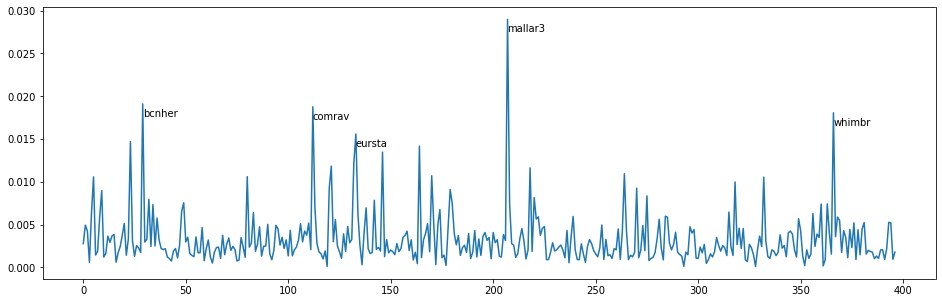

In [68]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [69]:
top5_birds

['bcnher', 'comrav', 'eursta', 'mallar3', 'whimbr']

## audio_id: 21767

In [70]:
idx = valid_df[valid_df["audio_id"] == 21767].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "first_label", "second_label", "third_label"]]

,row_id,seconds,birds,oof_birds,first_label,second_label,third_label
240,21767_COR_5,5,grekis rucwar,nocall,sobtyr1,rucwar,thswar1
241,21767_COR_10,10,grekis rucwar,nocall,grekis,buggna,bugtan
242,21767_COR_15,15,rucwar,rucwar,rucwar,grekis,thswar1
243,21767_COR_20,20,rucwar,nocall,grekis,rucwar,gcrwar
244,21767_COR_25,25,rucwar,nocall,fepowl,blbgra1,buggna
245,21767_COR_30,30,grekis rucwar,rucwar,rucwar,tenwar,thswar1
246,21767_COR_35,35,rucwar,grekis,grekis,barswa,compot1
247,21767_COR_40,40,grekis rucwar,nocall,lobgna5,swathr,eursta
248,21767_COR_45,45,rucwar,rucwar,rucwar,swathr,tenwar
249,21767_COR_50,50,nocall,nocall,rucwar,cinfly2,thbeup1


In [71]:
len(df[df["birds"] == "nocall"])

22

In [72]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.19027777777777777

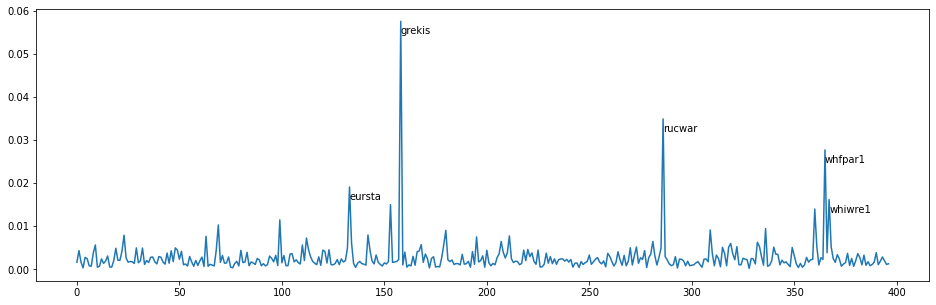

In [73]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [74]:
top5_birds

['eursta', 'grekis', 'rucwar', 'whfpar1', 'whiwre1']

## audio_id: 26709

In [76]:
idx = valid_df[valid_df["audio_id"] == 26709].index.values
df = valid_df.loc[idx]
df[["row_id", "seconds", "birds", "oof_birds", "first_label", "second_label", "third_label"]]

,row_id,seconds,birds,oof_birds,first_label,second_label,third_label
1440,26709_SSW_5,5,amegfi,nocall,amegfi,houwre,reevir1
1441,26709_SSW_10,10,nocall,nocall,haiwoo,comrav,mallar3
1442,26709_SSW_15,15,nocall,nocall,comrav,daejun,mallar3
1443,26709_SSW_20,20,nocall,nocall,redcro,comrav,barswa
1444,26709_SSW_25,25,nocall,nocall,mallar3,whimbr,comrav
1445,26709_SSW_30,30,nocall,nocall,btywar,macwar,daejun
1446,26709_SSW_35,35,nocall,nocall,grhowl,whimbr,bcnher
1447,26709_SSW_40,40,nocall,nocall,cangoo,mallar3,whimbr
1448,26709_SSW_45,45,nocall,nocall,cangoo,mallar3,whimbr
1449,26709_SSW_50,50,nocall,nocall,mallar3,bcnher,cubthr


In [89]:
np.max(oof[1514, :])

0.12782021135919625

In [77]:
len(df[df["birds"] == "nocall"])

62

In [78]:
row_wise_micro_averaged_f1_score( df["birds"].values, df["first_label"])

0.13055555555555554

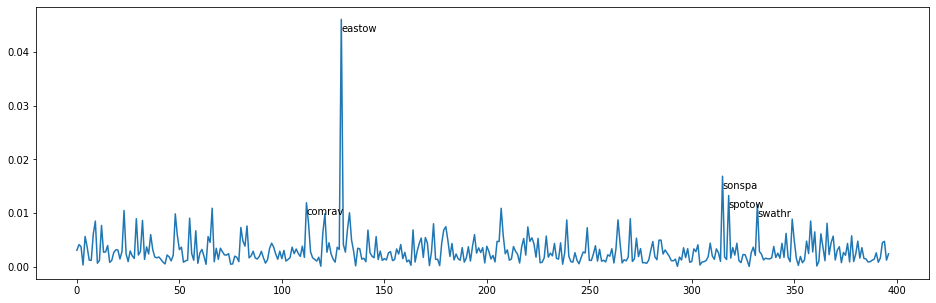

In [79]:
mean_ = oof[idx, :].mean(0) 

plt.figure(figsize=(16, 5))
plt.plot(mean_)

top5_bc = np.argsort(mean_)[-5:]
top5_birds = []
for bc in range(len(mean_)):
    if bc in top5_bc:
        plt.text(bc, mean_[bc] - mean_.max() * 0.05, s=const.INV_BIRD_CODE[bc])
        top5_birds.append(const.INV_BIRD_CODE[bc])

In [80]:
top5_birds

['comrav', 'eastow', 'sonspa', 'spotow', 'swathr']